In [ ]:
from google.colab import drive
drive.mount('/content/drive')
features_data = '/content/drive/MyDrive/data/features.txt'
target_data = '/content/drive/MyDrive/data/target.txt'

Mounted at /content/drive


Initial loss = 641400.0
BGD converged in 2 iterations and 0.22 seconds
SGD converged in 937 iterations and 2.26 seconds
MBGD converged in 339 iterations and 0.75 seconds


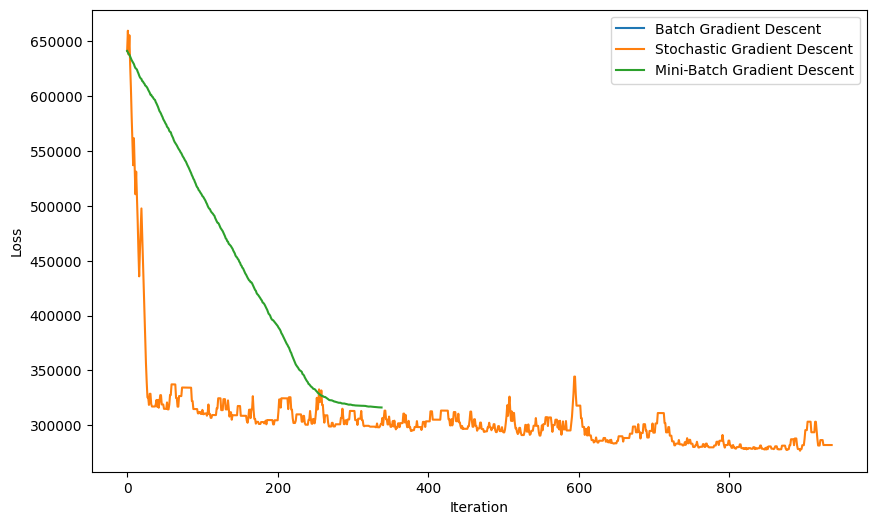

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def compute_gradient(w, b, x, y, C):
    n = len(x)
    dw = np.zeros_like(w)
    db = 0
    for i in range(n):
        condition = y[i] * (np.dot(w, x[i]) + b) >= 1
        if condition:
            dw += w
        else:
            dw += w - C * y[i] * x[i]
            db += -C * y[i]
    dw /= n
    db /= n
    return dw, db

def gradient_descent(features, target, learning_rate, batch_size, max_iterations, convergence_criteria):
    n, d = features.shape
    w = np.zeros(d)
    b = 0
    C = 100
    loss_values = []
    iterations = []

    for t in range(max_iterations):
        #BGD
        if batch_size == n:
            batch_indices = np.arange(n)
        #SGD
        elif batch_size == 1:
            batch_indices = np.random.choice(n, size=1, replace=False)
        #MBGD
        else:
            batch_indices = np.random.choice(n, size=batch_size, replace=False)

        x_batch = features[batch_indices]
        y_batch = target[batch_indices]

        dw, db = compute_gradient(w, b, x_batch, y_batch, C)
        w_new = w - learning_rate * dw
        b_new = b - learning_rate * db

        loss = 0.5 * np.dot(w, w) + C * np.sum(np.maximum(0, 1 - target * (np.dot(features, w) + b)))
        loss_values.append(loss)
        iterations.append(t)

        w = w_new
        b = b_new

        #BGD
        if t > 0:
            if batch_size == n:
                delta_loss_pct = abs(loss_values[-2] - loss_values[-1]) / loss_values[-2] * 100
                if delta_loss_pct < convergence_criteria:
                    break
            #SGD/MBGD
            else:
                delta_loss_pct = abs(loss_values[-2] - loss_values[-1]) / loss_values[-2] * 100
                delta_loss = 0.5 * delta_loss_pct + 0.5 * (0 if t == 1 else delta_loss)
                if delta_loss < convergence_criteria:
                    break

    return w, b, loss_values, iterations


#test
initial_loss = 0.5 * np.dot(np.zeros_like(features[0]), np.zeros_like(features[0])) + 100 * np.sum(np.maximum(0, 1 - target * (np.dot(features, np.zeros_like(features[0])) + 0)))
print(f"Initial loss = {initial_loss}")

#BGD
start_time = time.time()
bgd_w, bgd_b, bgd_loss, bgd_iterations = gradient_descent(features, target, learning_rate=3e-7, batch_size=len(features), max_iterations=1000, convergence_criteria=0.25)
bgd_time = time.time() - start_time
print(f"BGD converged in {len(bgd_iterations)} iterations and {bgd_time:.2f} seconds")

#SGD
start_time = time.time()
sgd_w, sgd_b, sgd_loss, sgd_iterations = gradient_descent(features, target, learning_rate=0.0001, batch_size=1, max_iterations=5000, convergence_criteria=0.001)
sgd_time = time.time() - start_time
print(f"SGD converged in {len(sgd_iterations)} iterations and {sgd_time:.2f} seconds")

#MBGD
start_time = time.time()
mbgd_w, mbgd_b, mbgd_loss, mbgd_iterations = gradient_descent(features, target, learning_rate=1e-5, batch_size=20, max_iterations=1000, convergence_criteria=0.01)
mbgd_time = time.time() - start_time
print(f"MBGD converged in {len(mbgd_iterations)} iterations and {mbgd_time:.2f} seconds")




plt.figure(figsize=(10, 6))
plt.plot(bgd_iterations, bgd_loss, label='Batch Gradient Descent')
plt.plot(sgd_iterations, sgd_loss, label='Stochastic Gradient Descent')
plt.plot(mbgd_iterations, mbgd_loss, label='Mini-Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()